In [89]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, Embedding, LSTM, Input
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import torch
import torch.nn as nn
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.compose import ColumnTransformer, make_column_transformer
import altair as alt
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np


In [4]:
credit_df = pd.read_csv('Downloads/UCI_Credit_Card.csv' , index_col = 0)
credit_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000.0,2,2,1,24,2,2,-1,-1,-2,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
2,120000.0,2,2,2,26,-1,2,0,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
3,90000.0,2,2,2,34,0,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
4,50000.0,2,2,1,37,0,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
5,50000.0,1,2,1,57,-1,0,-1,0,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29996,220000.0,1,3,1,39,0,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29997,150000.0,1,3,2,43,-1,-1,-1,-1,0,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29998,30000.0,1,2,2,37,4,3,2,-1,0,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1


In [6]:
train_df, test_df = train_test_split(credit_df, test_size=0.2, random_state=123)
train_df.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
ID,,,,,,,,,,,,,,,,,,,,,
19683,200000.0,2,2,1,46,0,0,0,0,0,...,103422.0,95206.0,65108.0,3692.0,5000.0,3300.0,2500.0,2930.0,1500.0,0
11063,120000.0,2,1,1,32,-1,-1,-1,-1,-1,...,476.0,802.0,326.0,652.0,326.0,476.0,802.0,0.0,326.0,1
198,20000.0,2,1,2,22,0,0,0,0,-1,...,8332.0,18868.0,19247.0,1500.0,1032.0,541.0,20000.0,693.0,1000.0,0
23621,100000.0,2,5,2,34,0,0,0,0,0,...,23181.0,7721.0,3219.0,5004.0,3811.0,3002.0,4000.0,3219.0,1864.0,0
26032,290000.0,2,2,2,29,0,0,0,0,0,...,8770.0,9145.0,10016.0,1130.0,1502.0,1300.0,500.0,1000.0,1001.0,0


In [8]:
train_df["MARRIAGE"].replace(0, 3, inplace=True)
train_df["MARRIAGE"].unique()

array([1, 2, 3])

In [10]:
train_df["EDUCATION"].replace((0, 5,6), 4, inplace=True)
train_df["EDUCATION"].unique()

array([2, 1, 4, 3])

In [12]:
target = "default.payment.next.month"

binary_features = ["SEX"]
categorical_features = ["EDUCATION", "MARRIAGE"]
numeric_features = list(
    set(train_df.columns) - set(categorical_features) - set(binary_features) - set([target])
)
numeric_features

['PAY_3',
 'PAY_4',
 'PAY_AMT5',
 'PAY_5',
 'BILL_AMT3',
 'LIMIT_BAL',
 'PAY_AMT6',
 'PAY_AMT2',
 'BILL_AMT6',
 'PAY_AMT4',
 'BILL_AMT2',
 'PAY_AMT3',
 'BILL_AMT4',
 'AGE',
 'PAY_AMT1',
 'BILL_AMT1',
 'PAY_0',
 'PAY_2',
 'BILL_AMT5',
 'PAY_6']

In [14]:
X_train, y_train = train_df.drop(columns=["default.payment.next.month"]), train_df["default.payment.next.month"]
X_test, y_test = test_df.drop(columns=["default.payment.next.month"]), test_df["default.payment.next.month"]

In [16]:
X_test_original = X_test.copy()

In [18]:
no_scale_features = ['PAY_2','PAY_5','PAY_0','PAY_6','PAY_4','PAY_3']
scale_features    = [f for f in numeric_features if f not in no_scale_features]

# 2. Build a single transformer
preprocessor = ColumnTransformer([
    ('scaled_num',  StandardScaler(),            scale_features),
    ('passthrough', 'passthrough',               no_scale_features),
    ('bin',         OneHotEncoder(drop='if_binary'),    binary_features),
    ('cat',         OneHotEncoder(handle_unknown='ignore'),
                                        categorical_features),
])

In [20]:
X_train_proc = preprocessor.fit_transform(X_train)
X_test_proc  = preprocessor.transform(X_test)

In [22]:
cols_scaled = preprocessor.named_transformers_['scaled_num']\
                      .get_feature_names_out(scale_features)
cols_passth = no_scale_features
cols_bin    = preprocessor.named_transformers_['bin']\
                      .get_feature_names_out(binary_features)
cols_cat    = preprocessor.named_transformers_['cat']\
                      .get_feature_names_out(categorical_features)
all_cols = list(cols_scaled) + cols_passth + list(cols_bin) + list(cols_cat)


In [24]:
import pandas as pd
X_train_proc = pd.DataFrame(X_train_proc, columns=all_cols, index=X_train.index)
X_test_proc  = pd.DataFrame(X_test_proc,  columns=all_cols, index=X_test.index)

In [91]:
class TabularDataset(Dataset):
    def __init__(self, X_df, y_ser):
        # X_df: pandas DataFrame of shape (n_samples, n_features)
        # y_ser: pandas Series of shape (n_samples,)
        self.X = torch.tensor(X_df.values, dtype=torch.float32)
        self.y = torch.tensor(y_ser.values, dtype=torch.float32)

    def __len__(self):
        return len(self.y)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

train_ds = TabularDataset(X_train_proc, y_train)
test_ds  = TabularDataset(X_test_proc,  y_test)

train_loader = DataLoader(train_ds, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_ds,  batch_size=64, shuffle=False)


In [93]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [95]:
class TransformerClassifier(nn.Module):
    def __init__(self, feature_dim, embed_dim=64, num_heads=4, num_layers=2, dropout=0.1):
        super().__init__()
        # Embed each scalar feature → embedding dimension
        self.embed = nn.Linear(1, embed_dim)
        # Learnable positional embeddings (one per feature index)
        self.pos_embed = nn.Parameter(torch.randn(1, feature_dim, embed_dim))
        # Stacked Transformer Encoder
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=embed_dim,
            nhead=num_heads,
            dropout=dropout,
            batch_first=True
        )
        self.transformer = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)
        # Final head: flatten & linear → logits
        self.classifier = nn.Linear(feature_dim * embed_dim, 1)

    def forward(self, x):
        # x shape: [batch, feature_dim]
        x = x.unsqueeze(-1)          # → [batch, feature_dim, 1]
        x = self.embed(x)            # → [batch, feature_dim, embed_dim]
        x = x + self.pos_embed       # add positional info
        x = self.transformer(x)      # → [batch, feature_dim, embed_dim]
        x = x.flatten(1)             # → [batch, feature_dim * embed_dim]
        logits = self.classifier(x)  # → [batch, 1]
        return logits.squeeze(1)     # → [batch]


In [97]:
feat_dim = X_train_proc.shape[1]
model = TransformerClassifier(feature_dim=feat_dim).to(device)


In [99]:
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)
epochs = 10

for epoch in range(epochs):
    model.train()
    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        optimizer.zero_grad()
        logits = model(X_batch)
        loss = criterion(logits, y_batch)
        loss.backward()
        optimizer.step()
    print(f"Epoch {epoch+1}/{epochs} — loss: {loss.item():.4f}")


Epoch 1/10 — loss: 0.3487
Epoch 2/10 — loss: 0.3991
Epoch 3/10 — loss: 0.4259
Epoch 4/10 — loss: 0.4700
Epoch 5/10 — loss: 0.3823
Epoch 6/10 — loss: 0.5045
Epoch 7/10 — loss: 0.4387
Epoch 8/10 — loss: 0.3820
Epoch 9/10 — loss: 0.3456
Epoch 10/10 — loss: 0.3940


In [101]:
model.eval()
probs_list = []
with torch.no_grad():
    for X_batch, _ in test_loader:
        X_batch = X_batch.to(device)
        logits = model(X_batch)
        probs = torch.sigmoid(logits)
        probs_list.append(probs.cpu().numpy())

probs = np.concatenate(probs_list)
preds = (probs > 0.5).astype(int)

In [103]:
accuracy = accuracy_score(y_test, preds)

In [105]:
accuracy

0.8231666666666667

In [109]:
predictions_df = pd.DataFrame({'Predicted_Label': preds})

In [111]:
predictions_df

,Predicted_Label
0,0
1,0
2,1
3,0
4,0
...,...
5995,0
5996,0
5997,0
5998,0


In [115]:
merged_df = pd.concat([X_test_original.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)

In [118]:
merged_df

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Predicted_Label
0,40000.0,2,2,2,26,-1,0,0,0,-1,...,0.0,44024.0,18697.0,1300.0,1000.0,0.0,22373.0,680.0,10000.0,0
1,80000.0,2,3,1,59,0,0,0,0,0,...,50875.0,50372.0,49470.0,3212.0,2106.0,2000.0,1603.0,1903.0,2006.0,0
2,170000.0,2,1,2,30,2,2,2,2,2,...,157577.0,168094.0,170922.0,6800.0,6500.0,0.0,13000.0,5500.0,1000.0,1
3,200000.0,2,2,1,41,-2,-2,-2,-2,-2,...,0.0,0.0,0.0,742.0,0.0,0.0,0.0,0.0,0.0,0
4,50000.0,1,2,1,43,0,0,0,0,0,...,9225.0,9417.0,9617.0,1140.0,1150.0,331.0,341.0,356.0,330.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5995,160000.0,1,1,1,51,0,0,0,2,2,...,2457.0,4912.0,3669.0,1331.0,2473.0,0.0,2500.0,0.0,0.0,0
5996,70000.0,1,3,2,53,0,0,0,0,0,...,16100.0,16437.0,16764.0,1554.0,1263.0,576.0,596.0,600.0,622.0,0
5997,10000.0,1,2,1,45,1,2,2,2,2,...,6267.0,-610.0,-220.0,0.0,4312.0,0.0,0.0,780.0,1150.0,0
5998,50000.0,1,3,0,50,0,0,0,-1,-1,...,3400.0,2769.0,0.0,2266.0,0.0,3400.0,2769.0,1700.0,0.0,0


In [62]:
# merged_df = pd.concat([X_test_original.reset_index(drop=True), predictions_df.reset_index(drop=True)], axis=1)

In [120]:
import pandas as pd
import numpy as np
# from scipy.stats import f_oneway, pearsonr
import matplotlib.pyplot as plt

In [122]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import pointbiserialr, chi2_contingency

In [124]:
categorical_features = ["SEX", "EDUCATION", "MARRIAGE"]
target = "Predicted_Label"

In [126]:
numeric_features = [c for c in merged_df.columns 
    if c not in categorical_features and c != target]

In [128]:
def cramers_v(conf_mat):
    chi2, _, _, _ = chi2_contingency(conf_mat)
    n = conf_mat.values.sum()
    r, k = conf_mat.shape
    return np.sqrt(chi2 / (n * (min(r, k) - 1)))

In [130]:
records = []

In [132]:
for feat in numeric_features:
    r, p = pointbiserialr(merged_df[feat], merged_df[target])
    if p < 0.05:
        records.append({'Feature': feat,
                'Type': 'Numeric',
                'p_value': p,
                'effect_size': abs(r)
            })

for feat in categorical_features:
    conf = pd.crosstab(merged_df[feat], merged_df[target])
    chi2_stat, p, _, _ = chi2_contingency(conf)
    if p < 0.05:
        v = cramers_v(conf)
        records.append({'Feature': feat,
                'Type': 'Categorical',
                'p_value': p,
                'effect_size': v
            })

In [134]:
if not records:
    print("No features reached p < 0.05.")
else:
    eff_df = pd.DataFrame(records)
    eff_df = eff_df.sort_values('effect_size', ascending=False).reset_index(drop=True)
    
    # 5. Display ranked features
    display(eff_df[['Feature', 'Type', 'p_value', 'effect_size']])

,Feature,Type,p_value,effect_size
0,PAY_0,Numeric,0.000000e+00,0.664366
1,PAY_2,Numeric,3.982268e-319,0.464628
2,PAY_3,Numeric,3.210663e-220,0.392508
3,PAY_4,Numeric,6.524177e-192,0.368094
4,PAY_5,Numeric,5.012173e-175,0.352456
5,PAY_6,Numeric,3.841339e-143,0.320234
6,LIMIT_BAL,Numeric,8.493183e-44,0.177785
7,EDUCATION,Categorical,2.146673e-07,0.083326
8,PAY_AMT1,Numeric,3.262155e-07,0.065881
9,BILL_AMT5,Numeric,1.832913e-06,0.061548


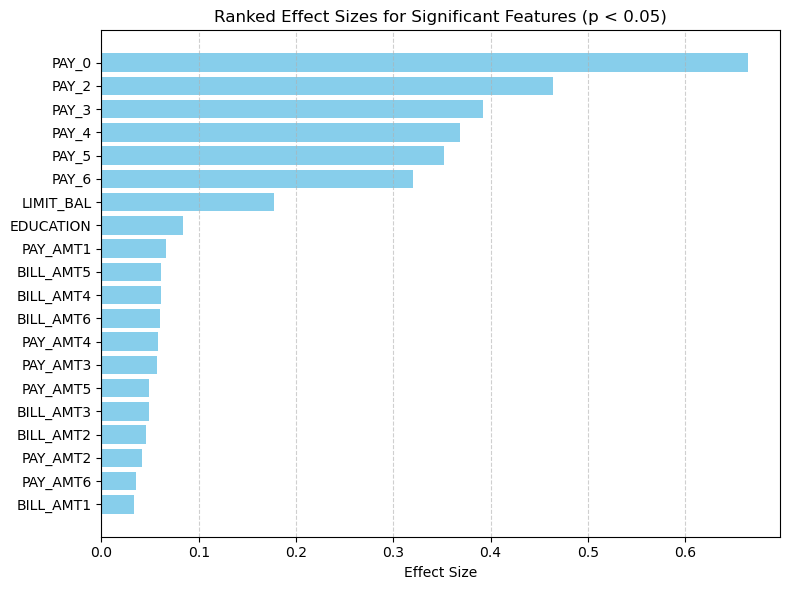

In [136]:
plt.figure(figsize=(8, 6))
plt.barh(eff_df['Feature'], eff_df['effect_size'], color='skyblue')
plt.xlabel("Effect Size")
plt.title("Ranked Effect Sizes for Significant Features (p < 0.05)")
plt.gca().invert_yaxis()  # largest effect at top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()